In [32]:
# Importing libraries and cleaned data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
df = pd.read_csv('data/data_clean3.csv')

In [49]:
nums = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_basement', 'grade', 'density','population','view', 'price'
]

In [54]:
nums[:-1]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_basement',
 'grade',
 'density',
 'population',
 'view']

## Visuals

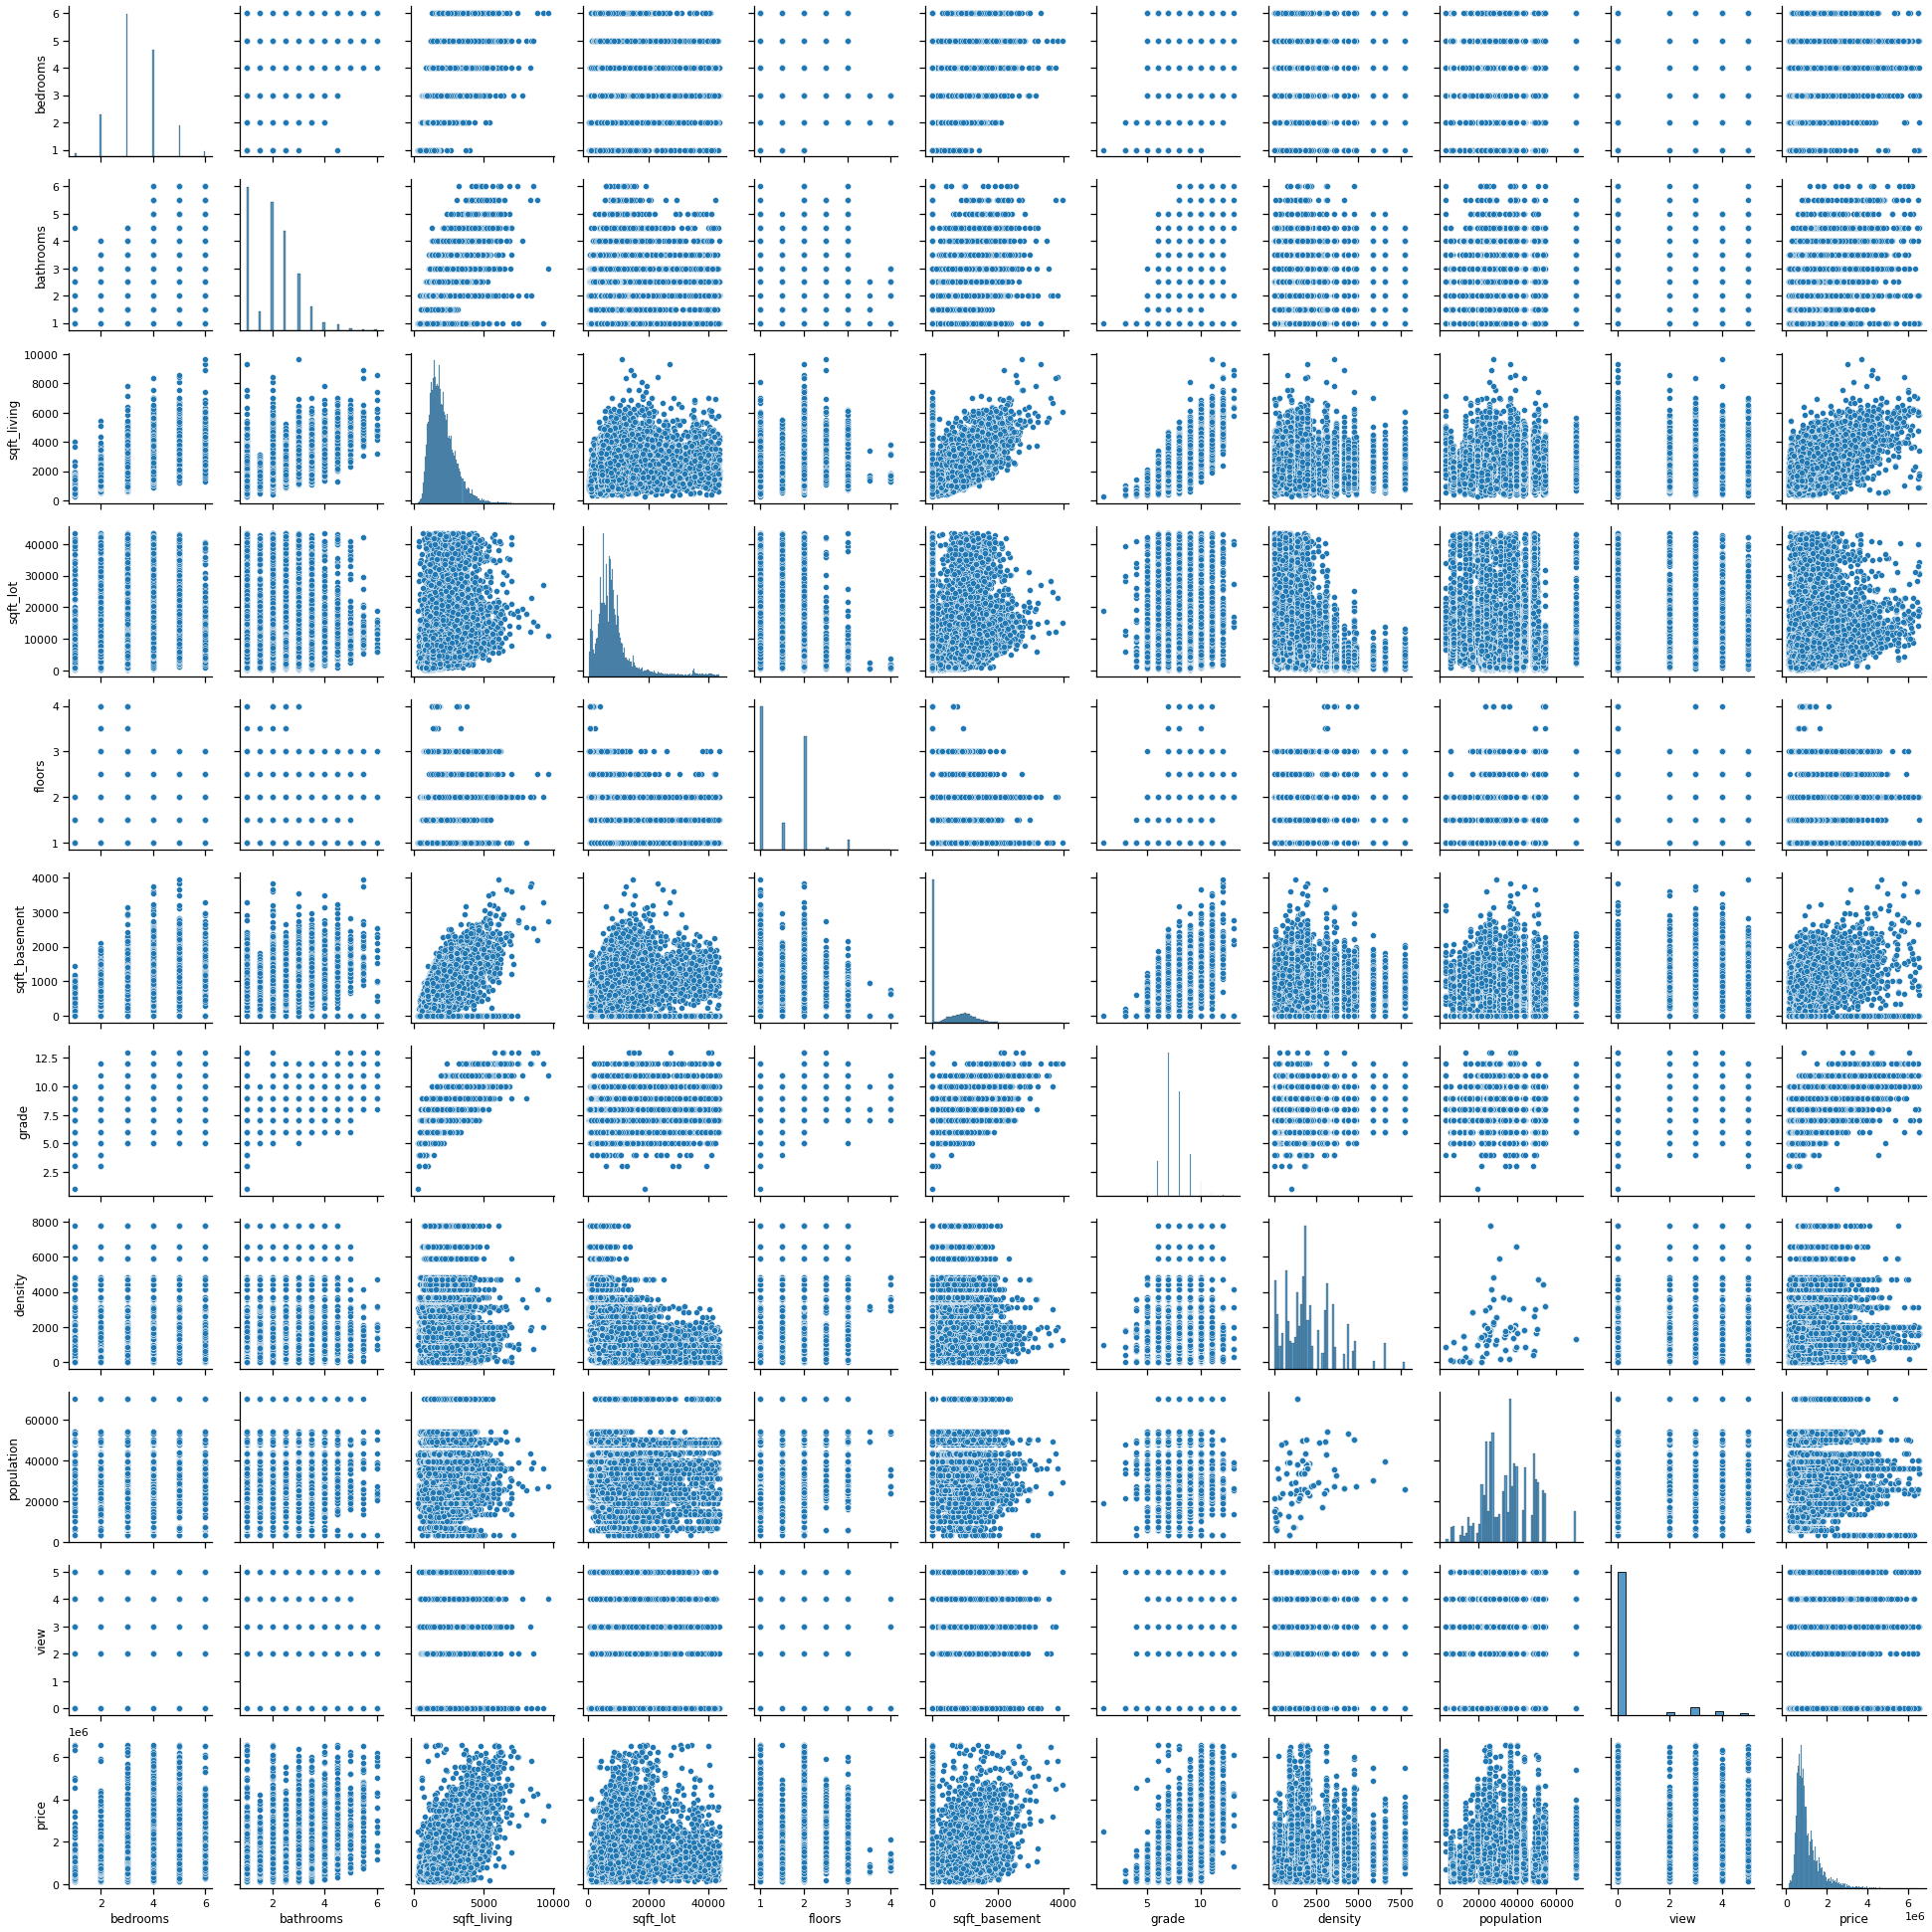

In [34]:
# Visualizing numerical data with a pairplot
nums = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_basement', 'grade', 'density','population','view', 'price'
]
sns.pairplot(data=df[nums]);

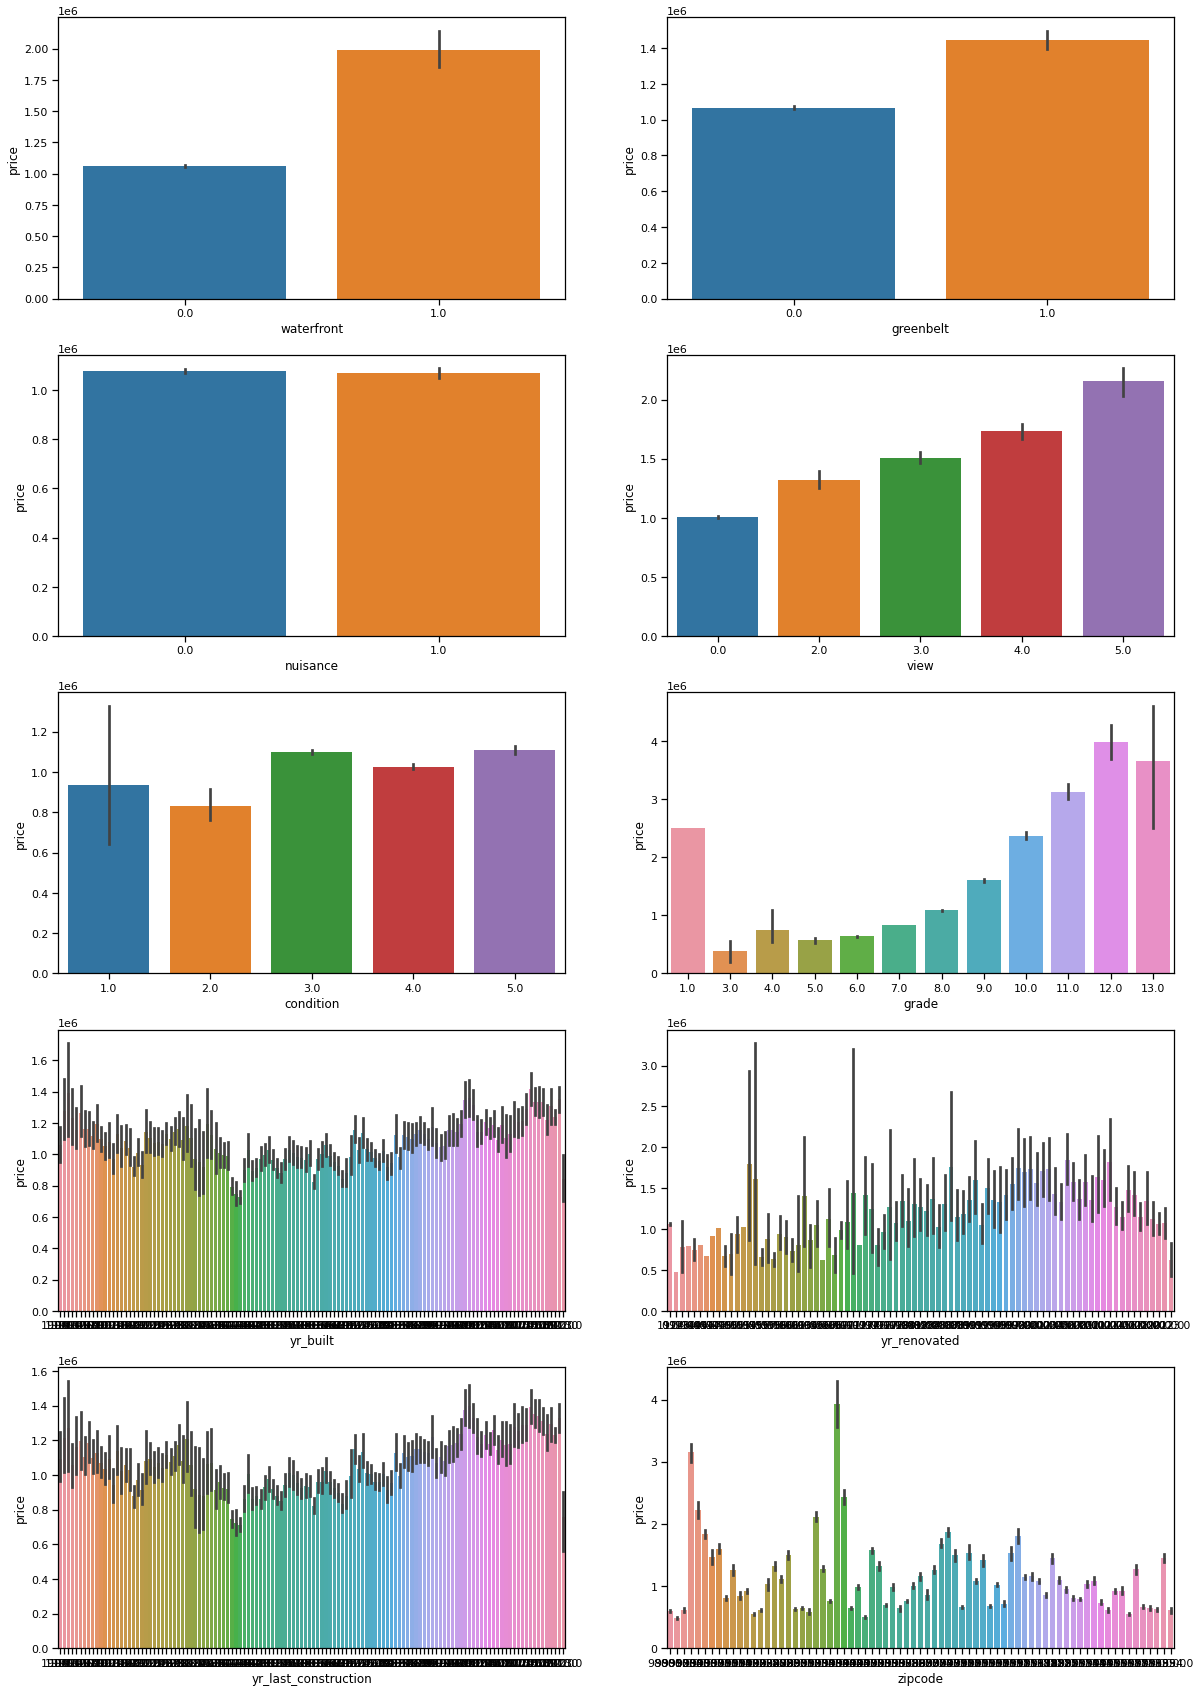

In [12]:
# Visualizing categorical data with barcharts
cats = [
    'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
    'yr_built', 'yr_renovated', 'yr_last_construction', 'zipcode'
]

fig,ax=plt.subplots(5,2,figsize=[20,30])
for i,j in enumerate(cats):
    col = i%2
    row = i//2
    axis = ax[row][col]
    sns.barplot(data=df, y='price', x=j, ax=axis)

# Based on the below graphs, the following variables appear to be correlated with 
# price and will be selected for modeling: waterfront, greenbelt, view, zipcode

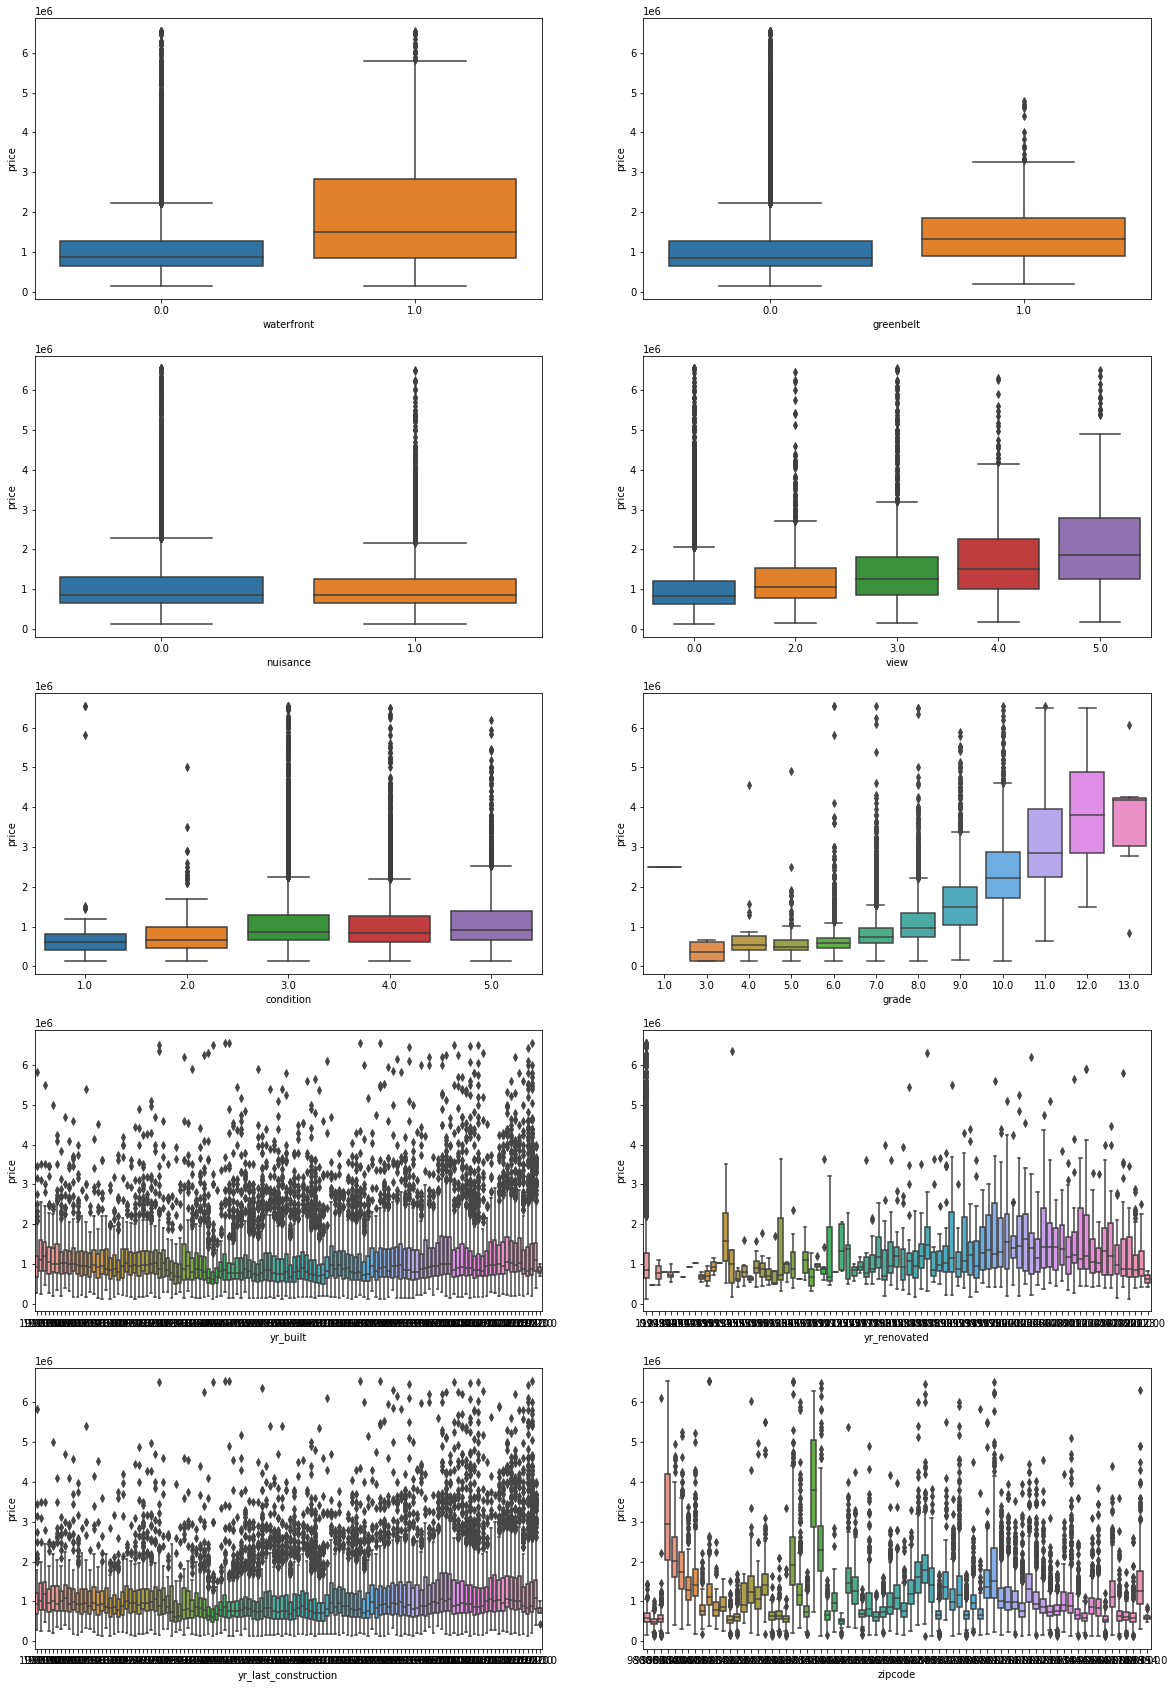

In [6]:
# Visualizing categorical data with box plots.
fig,ax=plt.subplots(5,2,figsize=[20,30])
for i,j in enumerate(cats):
    col = i%2
    row = i//2
    axis = ax[row][col]
    sns.boxplot(data=df, y='price', x=j, ax=axis)

# Correlations

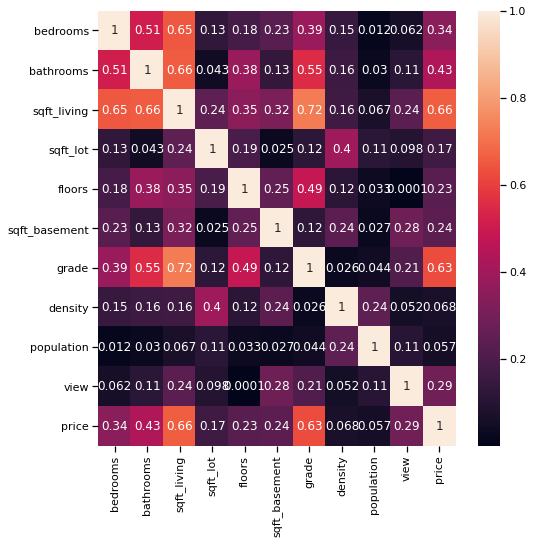

In [19]:
# Making a heatmap to visualize correlations between variables.
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df[nums].corr().abs(),annot=True,ax=ax);

In [20]:
# Sorting the numerical variables by their correlation to price.  
price_corr = df[nums].corr()['price'].sort_values(ascending=False)
price_corr = price_corr[price_corr.between(.2,.99)]
price_corr

# To select numerical features, I set a threashold of a correlation of 0.2. 

sqft_living      0.660635
grade            0.625292
bathrooms        0.433439
bedrooms         0.343864
view             0.291979
sqft_basement    0.240682
floors           0.234034
Name: price, dtype: float64

In [48]:
# Looking for multicollinearity by sorting pair-wise correlations between numerical variables.  
corr_df = df[nums[:-1]].corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df.index = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.rename(columns={0:'corr'},inplace=True)
corr_df = corr_df[corr_df['corr'].between(.5,.99)]
corr_df.drop_duplicates(subset=['corr'],inplace=True)
corr_df
# Since sqft_living and grade have a correlation above 0.7, I will not include both in my model
# to avoid multicollinearity. Since sqft_living is more correlated with price, we will drop grade.

,corr
"(sqft_living, grade)",0.724070
"(bathrooms, sqft_living)",0.659692
"(bedrooms, sqft_living)",0.651358
"(bathrooms, grade)",0.551723
"(bathrooms, bedrooms)",0.513853
